In [3]:
%matplotlib inline
import sys
sys.path.append('/ref/pipelines/')
import kang
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from collections import Counter
n=131
colors=cm.rainbow(np.linspace(0,1,n))

In [4]:
import seaborn as sns
colors = sns.color_palette("deep", 20)
#colors = sns.choose_colorbrewer_palette('qualitative')

In [6]:
file_fa = '/ref/References/Aha/Ahal.assembly.scf.fasta'
dic_fa  = kang.Fasta2dic(file_fa)

In [7]:
key = dic_fa.keys()
key.sort(key=lambda x : len(dic_fa[x]),reverse=True)
key[4]

'scaffold-4'

In [8]:
params = {'legend.fontsize': 'small',
          'figure.figsize': (5, 4),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)

In [9]:
file_kaks = './Ah2Ah.collinearity.kaks'
file_gff = './Ah2Ah.gff'

df_gff = pd.read_csv(file_gff,sep='\t',header=None)
df_gff.set_index(1,inplace=True)
df_kaks   = pd.read_csv(file_kaks,sep='\t',comment='#',header=None)

In [10]:
'000430F-pilon' in set(df_gff[0])

True

In [11]:
df_kaks.head()

,0,1,2,3,4,5
0,0- 0:,mRNA7810,mRNA23470,2.000000e-152,0.06229,0.055767
1,0- 1:,mRNA7811,mRNA23471,9.000000e-80,0.00000,0.000000
2,0- 2:,mRNA7812,mRNA23472,6.000000e-65,0.00000,0.000000
3,0- 3:,mRNA7813,mRNA23473,3.000000e-80,0.00000,0.000000
4,0- 4:,mRNA7814,mRNA23474,6.000000e-101,0.00000,0.000000


In [12]:
df_kaks['A.chr'] = df_kaks[1].apply(lambda x : df_gff.loc[x][0])
df_kaks['B.chr'] = df_kaks[2].apply(lambda x : df_gff.loc[x][0])
df_kaks['posA'] = df_kaks[1].apply(lambda x : df_gff.loc[x][2])
df_kaks['posB'] = df_kaks[2].apply(lambda x : df_gff.loc[x][2])
df_kaks.columns = [0, 1, 2, 3, 'ka', 'ks', u'A.chr', u'B.chr', u'posA',u'posB']

In [13]:
df_kaks['SB'] = df_kaks[0].apply(lambda x : x.split('-')[0])

In [14]:
df_kaks_sbix = df_kaks.set_index('SB')

In [15]:
df_kaks_sbix.head()

,0,1,2,3,ka,ks,A.chr,B.chr,posA,posB
SB,,,,,,,,,,
0,0- 0:,mRNA7810,mRNA23470,2.000000e-152,0.06229,0.055767,001501F-pilon,001931F-pilon,15973,1922
0,0- 1:,mRNA7811,mRNA23471,9.000000e-80,0.00000,0.000000,001501F-pilon,001931F-pilon,18196,4588
0,0- 2:,mRNA7812,mRNA23472,6.000000e-65,0.00000,0.000000,001501F-pilon,001931F-pilon,19081,5473
0,0- 3:,mRNA7813,mRNA23473,3.000000e-80,0.00000,0.000000,001501F-pilon,001931F-pilon,20188,6580
0,0- 4:,mRNA7814,mRNA23474,6.000000e-101,0.00000,0.000000,001501F-pilon,001931F-pilon,21078,7470


In [24]:
ks_list   = []
sb_length = []
number_SB_lowKs = 0
number_gene_in_SB_lowKs = 0 
number_SB_lowKs_same_chr = 0
low_a = []
dic = {'synblock id' : [],
       'ChrA' : [],
       'ChrB' : [],
       'ChrA_len' : [],
       'ChrB_len' : [],
       'synblockA_len' : [],
       'synblockB_len' : [],
       'ratioA' : [],
       'ratioB' :[],
       'Ks':[]
      }
for ix in set(df_kaks_sbix.index):
    edf  = df_kaks_sbix.loc[ix]
    ks   = edf['ks']
    chrA = edf['A.chr'].values[0]
    chrB = edf['B.chr'].values[0]
    chrA_len = len(dic_fa[chrA])
    chrB_len = len(dic_fa[chrB])
    posA_len = np.max(edf['posA']) - np.min(edf['posA'])
    posB_len = np.max(edf['posB']) - np.min(edf['posB'])
    ratioA   = float(posA_len)/chrA_len
    ratioB   = float(posB_len)/chrB_len
    sb_length.append(posA_len)
    mask = (ks > 0)
    ks   = ks[mask]
    if np.mean(ks) < 0.2:
        if np.max([ratioA,ratioB]) > 0.7:
            print ix,chrA,chrB,chrA_len,chrB_len,ratioA,ratioB
            dic['synblock id'].append(ix)
            dic['ChrA'].append(chrA)
            dic['ChrB'].append(chrB)
            dic['ChrA_len'].append(chrA_len)
            dic['ChrB_len'].append(chrB_len)
            dic['synblockA_len'].append(posA_len)
            dic['synblockB_len'].append(posB_len)
            dic['ratioA'].append(ratioA)
            dic['ratioB'].append(ratioB)
            dic['Ks'].append(np.mean(ks))
        if edf[['A.chr','B.chr']].values[0][1] == edf[['A.chr','B.chr']].values[0][0]:
            number_SB_lowKs_same_chr += 1
        number_gene_in_SB_lowKs += len(edf)
        number_SB_lowKs+=1
    ks_list.append(np.mean(ks))
print number_SB_lowKs,number_gene_in_SB_lowKs, number_SB_lowKs_same_chr

449 scaffold-80 scaffold-902 1910584 32793 0.0361983561047 0.931448784802
443 scaffold-77 scaffold-947 3518929 56809 0.0127734887518 0.763769825204
442 scaffold-77 scaffold-942 3518929 54235 0.0119340287911 0.80958790449
  0 001501F-pilon 001931F-pilon 27400 15227 0.392883211679 0.736060944375
335 scaffold-36 scaffold-918 4677813 41062 0.00707296336985 0.859529491988
336 scaffold-36 scaffold-935 4677813 50245 0.0104674983801 0.806727037516
 28 scaffold-104 scaffold-956 1755753 70353 0.0332723338647 0.979105368641
147 scaffold-145 scaffold-177 430301 113502 0.204026948578 0.994581593276
136 scaffold-140 scaffold-200 183261 42654 0.306038928086 0.865897688376
139 scaffold-140 scaffold-200 183261 42654 0.280736217744 0.701739578937
138 scaffold-140 scaffold-200 183261 42654 0.354150637615 0.901392600928
401 scaffold-6 scaffold-845 2522747 22055 0.00693648629847 0.756653819995
 63 scaffold-113 scaffold-939 2012682 52435 0.0191182710433 0.820406217221
 62 scaffold-113 scaffold-883 2012682 2

In [25]:
df_lowks_sb = pd.DataFrame(dic)

In [26]:
df_lowks_sb.to_pickle('df_lowks_sb.pk')

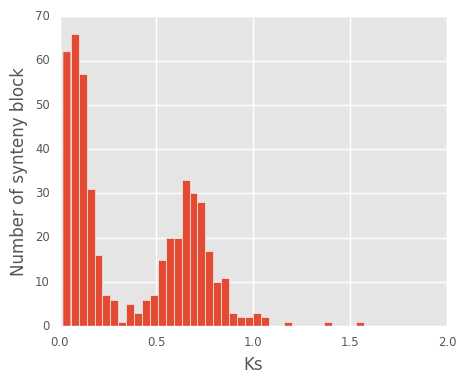

In [45]:
import matplotlib
matplotlib.style.use('ggplot')
plt.hist(ks_list,bins=50)
plt.xlabel('Ks')
plt.ylabel('Number of synteny block')
plt.xlim(0,2)
plt.savefig('ks.png',dpi=300)

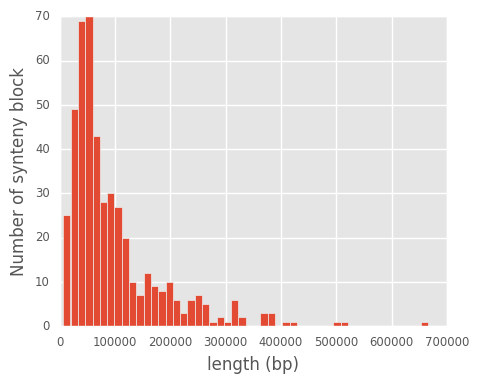

In [46]:
plt.hist(sb_length,bins=50)
plt.xlabel('length (bp)')
plt.ylabel('Number of synteny block')
#plt.xlim(0,2)
plt.savefig('sb.png',dpi=300)

In [47]:
chrs = set(df_kaks['A.chr'])

TypeError: unsupported operand type(s) for -: 'str' and 'int'

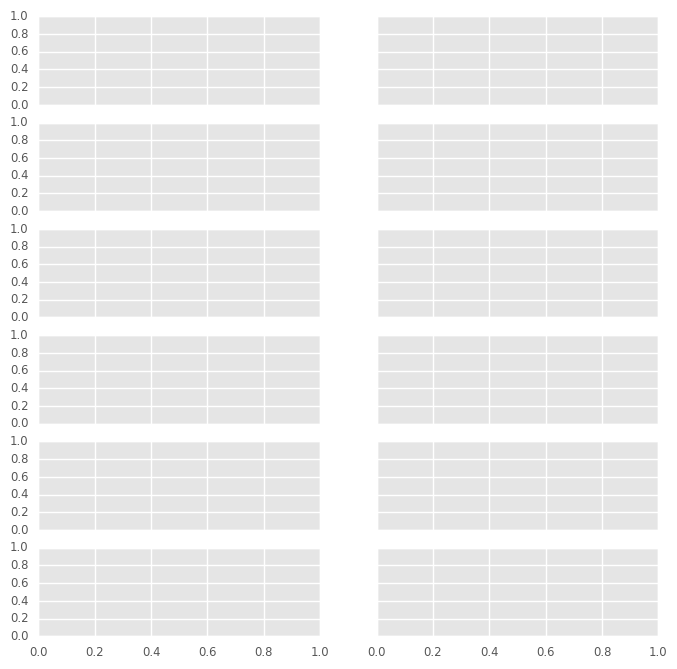

In [20]:
fig,ax = plt.subplots(6,2,figsize=(8,8),sharex=True,sharey=True)
for echr in chrs:
    mask = df_kaks['A.chr'] == echr
    edf  = df_kaks[mask]
    y    = edf['ks']
    x    = edf['pos']
    c    = [colors[i-1] for i in edf['B.chr'].values]
    if echr in {1,2,3,4,5,6}:
        ax[echr-1,0].scatter(x,y,color=c,s=3,alpha=0.4)
        ax[echr-1,0].set_title('chromosome %d'%echr)
        ax[echr-1,0].set_ylim(0,3)
    else:
        ax[(echr-6-1),1].scatter(x,y,color=c,s=3,alpha=0.4)
        ax[(echr-6-1),1].set_title('chromosome %d'%echr)
        ax[(echr-6-1),1].set_ylim(0,3)
Ca_chrs = list(set(df_kaks['Ca.chr'].values))
fig.text(0.5, -0.02, 'Genomic position (bp)', ha='center',fontsize=10)
fig.text(-0.02, 0.5, 'Ks', va='center', rotation='vertical',fontsize=10)
plt.figlegend([mpatches.Patch(color=colors[x-1]) for x in Ca_chrs],Ca_chrs,bbox_to_anchor=[1.1,1.1],loc='best')
plt.tight_layout()
plt.savefig('synteny.png',dpi=300,bbox_inches='tight')

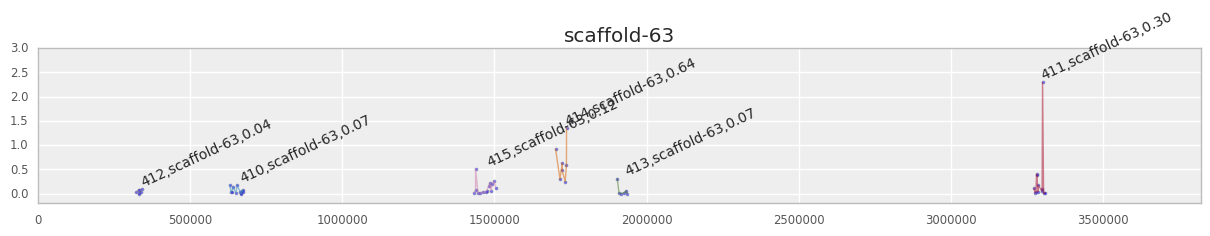

In [50]:
matplotlib.style.use('bmh')
#echr = '000430F-pilon'
echr = 'scaffold-63'
fig,ax = plt.subplots(1,figsize=(15,2))
mask = df_kaks['A.chr'] == echr
edf  = df_kaks[mask]
y    = edf['ks']
x    = edf['posA']

n=len(set(edf['A.chr'].values))
#colors = ['red','blue','green']
dicColor    = dict(zip(list(set(edf['A.chr'].values)),colors))
#print dicColor
c    = [dicColor[i] for i in edf['A.chr'].values]

ax.scatter(x,y,s=5,alpha=0.5,marker='o',edgecolor='gray')
#mask = df_kaks['A.chr'] == echr
#edf  = df_kaks[mask]
#y    = edf['ks']
#x    = edf['pos']
#c    = [colors[i-1] for i in edf['B.chr'].values]
#ax.scatter(x,y,color=c,s=15,alpha=0.8,marker='o',edgecolor='gray')
ax.set_title(echr)
ax.set_xlim(0,len(dic_fa[echr]))
ax.set_ylim(-0.2,3)
sb = []
for ix in edf['SB']:
    if ix in set(sb):
        continue
    eedf = edf[(edf['SB']==ix)]
    m = eedf['ks'] >= 0
    y = eedf['ks'][m]
    x = eedf['posA'][m]
    
    ax.plot(x,y,linewidth=1,alpha=0.5)
    
    ks = np.mean(y)
    y  = np.max(eedf['ks'])
    x  = np.mean(eedf['posA'])
    sc =  eedf['A.chr'].values[0]
    if ks < 1:
        ax.text(x,y,'%s,%s,%0.2f'%(ix,sc,ks),rotation=25,ha='left',va='bottom')
    sb.append(ix)
plt.savefig('synteny_%s.png'%echr,dpi=300,bbox_inches='tight')
#plt.legend()

In [92]:
len(dic_fa['scaffold-86'])

1142843

In [122]:
df_kaks_sbix.loc['431']

,0,1,2,3,ka,ks,A.chr,B.chr,pos
SB,,,,,,,,,
431,431- 0:,g25412.t1,g25627.t1,0.000000e+00,0.028294,0.049740,scaffold-60,scaffold-60,1923
431,431- 1:,g25413.t1,g25628.t1,0.000000e+00,0.038670,0.058557,scaffold-60,scaffold-60,4991
431,431- 2:,g25414.t1,g25630.t1,6.000000e-86,0.068212,0.127253,scaffold-60,scaffold-60,8088
431,431- 3:,g25415.t1,g25631.t1,4.000000e-142,0.024329,0.030004,scaffold-60,scaffold-60,10563
431,431- 4:,g25416.t1,g25632.t1,0.000000e+00,0.040982,0.079939,scaffold-60,scaffold-60,13518
431,431- 5:,g25417.t1,g25636.t1,0.000000e+00,0.004122,0.042565,scaffold-60,scaffold-60,17060
431,431- 6:,g25418.t1,g25637.t1,2.000000e-58,0.115132,0.213222,scaffold-60,scaffold-60,20107
431,431- 7:,g25419.t1,g25638.t1,0.000000e+00,0.006094,0.074922,scaffold-60,scaffold-60,23762
431,431- 8:,g25420.t1,g25639.t1,4.000000e-93,0.000000,0.011811,scaffold-60,scaffold-60,26714


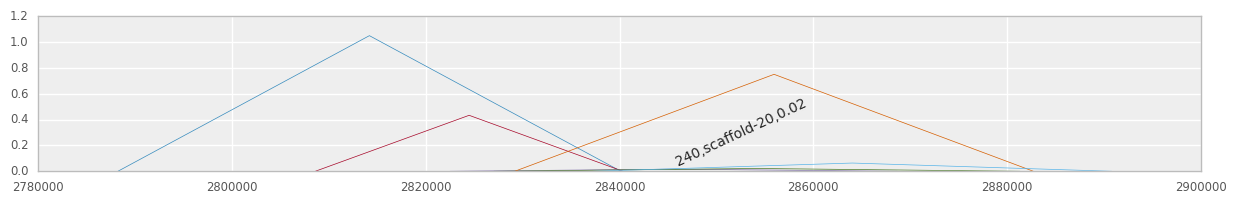

In [81]:
matplotlib.style.use('bmh')
#echr = '000430F-pilon'
echr = 'scaffold-20'
fig,ax = plt.subplots(1,figsize=(15,2))
mask = df_kaks['B.chr'] == echr
edf  = df_kaks[mask]
done = []
for ix in edf.index:
    if edf.loc[ix]['A.chr'] == edf.loc[ix]['B.chr']:
        pos_a = edf.loc[ix]['posA']
        pos_b = edf.loc[ix]['posB']
        pos_m = (pos_a + pos_b)/2 
        ks    = edf.loc[ix]['ks']
        sb    = edf.loc[ix]['SB']
        y = [0,ks,0]
        ax.plot([pos_a,pos_m,pos_b],y,linewidth=0.5)
        if ks < 0.05:
            if sb not in set(done):
                ax.text(pos_m,ks,'%s,%s,%0.2f'%(sb,echr,ks),rotation=25,ha='left',va='bottom')
                done.append(sb)
#ax.set_xlim(0,1000000)



In [91]:
'%0.3f'%np.mean(df_kaks_sbix.xs('337')['ks'])

'0.017'